In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [61]:
wti_df = pd.read_csv('../data/wti_prices.csv', index_col=0, parse_dates=['Date'])
wti_df.head()

,WTI_price
Date,
1986-01-01,22.93
1986-02-01,15.46
1986-03-01,12.61
1986-04-01,12.84
1986-05-01,15.38


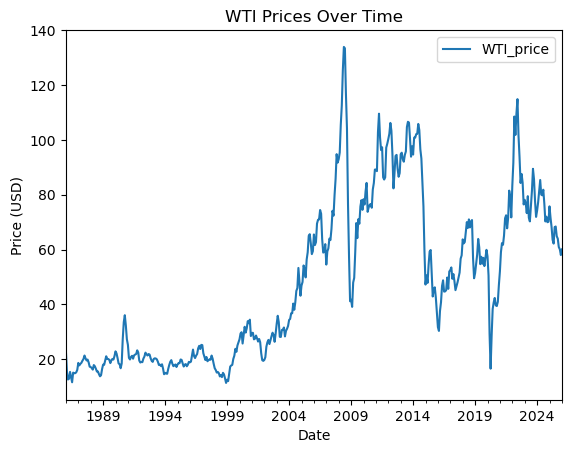

In [62]:
wti_df.plot(title='WTI Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

Does not look stationary hence we try the log difference

<Axes: xlabel='Date'>

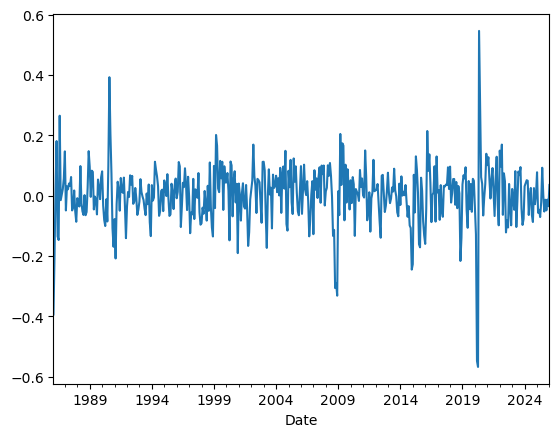

In [63]:
wti_diff_df = np.log(wti_df['WTI_price']).diff().dropna()
wti_diff_df.plot()

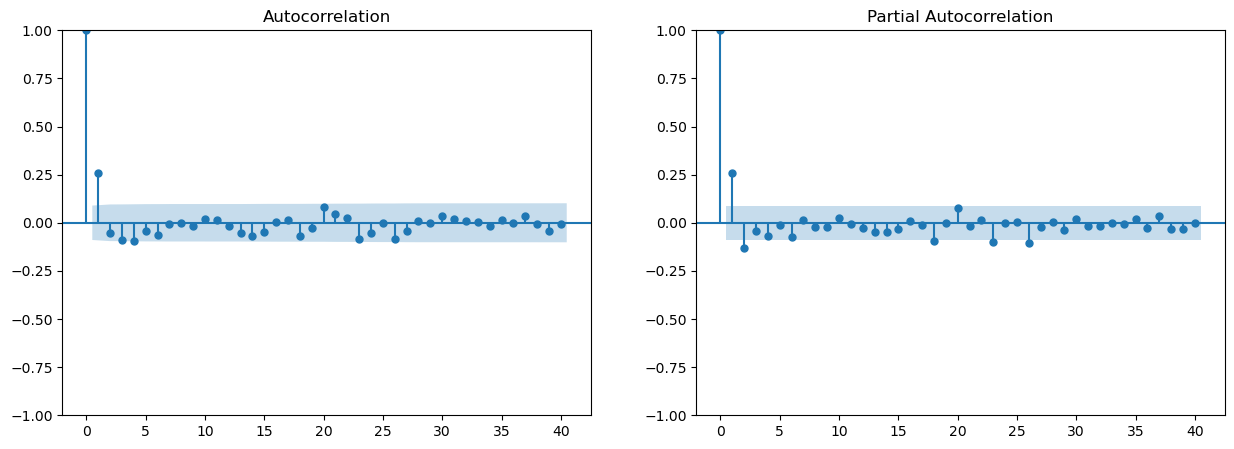

In [64]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plot_acf(wti_diff_df, ax=ax[0], lags=40)
plot_pacf(wti_diff_df, ax=ax[1], lags=40)
plt.show()

c:\Users\Josiah Lee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


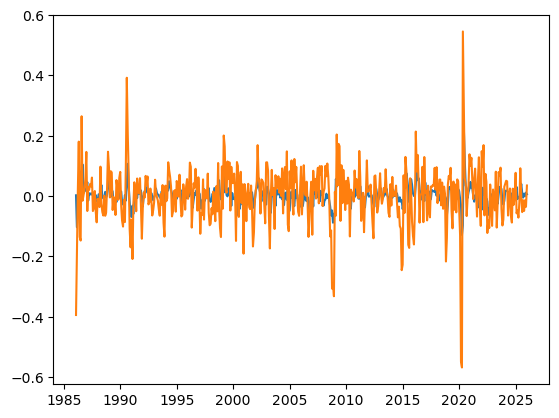

In [65]:
model = ARIMA(wti_diff_df, order=(2, 0, 1), trend = 'c', freq = 'MS')
model = model.fit()
 
fig, ax = plt.subplots()
ax.plot(model.fittedvalues)
ax.plot(wti_diff_df)
plt.show()

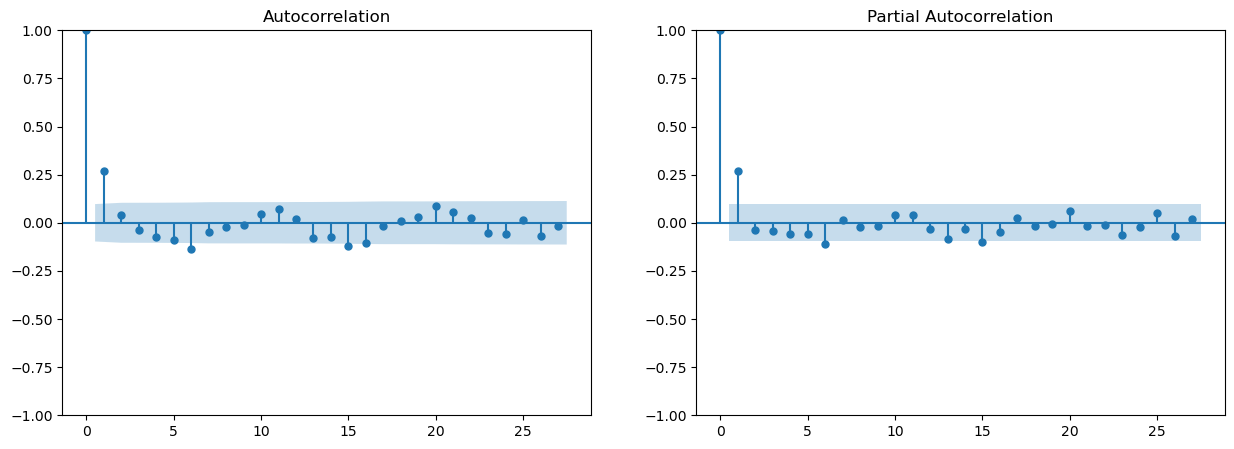

In [71]:
df = wti_diff_df[wti_diff_df.index < pd.to_datetime('2020-01-01')]
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_acf(df,ax=ax[0])
plot_pacf(df, ax=ax[1])
plt.show()

c:\Users\Josiah Lee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


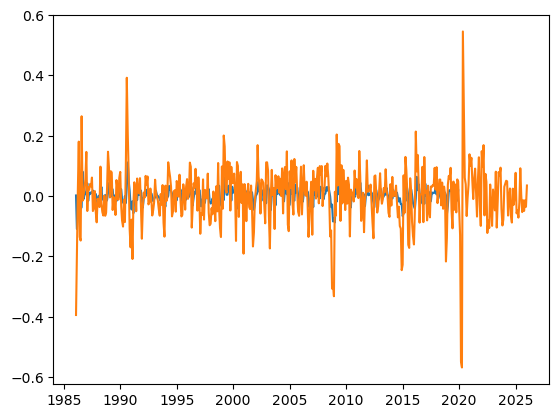

In [74]:
model = ARIMA(df, order=(1, 0, 1), freq = 'MS')
model = model.fit()
 
fig, ax = plt.subplots()
ax.plot(model.fittedvalues)
ax.plot(wti_diff_df)
plt.show()